In [1]:
import numpy as np, pandas as pd, tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/2025-2 MLP/source/TSLA.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [19]:
data = df.drop(columns=["Date", "Adj Close", "Volume"])
data = data.dropna()

display(data.head())

,Open,High,Low,Close
0,3.800,5.000,3.508,4.778
1,5.158,6.084,4.660,4.766
2,5.000,5.184,4.054,4.392
3,4.600,4.620,3.742,3.840
4,4.000,4.000,3.166,3.222


In [20]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data)
data

array([[4.64594174e-04, 1.34982149e-03, 4.21744904e-04, 1.31893210e-03],
       [1.56759922e-03, 2.22389944e-03, 1.37067094e-03, 1.30915016e-03],
       [1.43926727e-03, 1.49818896e-03, 8.71496305e-04, 1.00427957e-03],
       ...,
       [7.52749776e-01, 8.01937480e-01, 7.56796518e-01, 8.07678787e-01],
       [7.93312423e-01, 8.36481271e-01, 8.01812864e-01, 8.11860573e-01],
       [8.17508664e-01, 8.23410451e-01, 8.12026969e-01, 8.23933120e-01]])

In [21]:
window = 12
X, y = [], []
for i in range(len(data)-window):
  X.append(data[i:i+window])
  y.append(data[i+window][3])
X, y = np.array(X), np.array(y)

In [22]:
train_size = int(len(X) * 0.8)

X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(y)]

In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=(window,4)),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


295/295 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0030
Epoch 2/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 6.8046e-06
Epoch 3/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 4.9364e-06
Epoch 4/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 4.8614e-06
Epoch 5/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 3.6357e-06
Epoch 6/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 3.2724e-06
Epoch 7/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 3.4006e-06
Epoch 8/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 2.4796e-06
Epoch 9/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 2.8920e-06
Epoch 10/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 3.9044e-06
Epoch 11/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 3.3539e-06
Epoch 12/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 3.3601e-06
Epoch 13/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 2.8856e-06
Epoch 14/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.9989e-06
Epoch 15/50
2

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


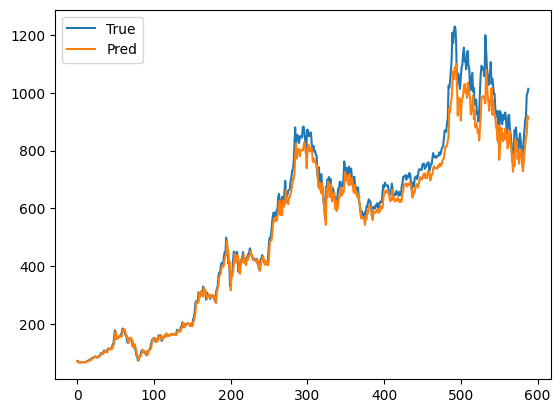

In [24]:
pred = model.predict(X_test)

dummy_y_test = np.zeros((len(y_test), data.shape[1]))
dummy_pred = np.zeros((len(pred), data.shape[1]))

dummy_y_test[:, 3] = y_test
dummy_pred[:, 3] = pred[:, 0]

inverted_y_test = scaler.inverse_transform(dummy_y_test)[:, 3]
inverted_pred = scaler.inverse_transform(dummy_pred)[:, 3]

plt.plot(inverted_y_test, label='True')
plt.plot(inverted_pred, label='Pred')
plt.legend()
plt.show()

In [26]:
model_LSTM = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=True, input_shape=(window,4)),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1)
])
model_LSTM.compile(optimizer='adam', loss='mse')
model_LSTM.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1)

Epoch 1/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - loss: 6.4995e-05
Epoch 2/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - loss: 5.9918e-06
Epoch 3/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 5.0472e-06
Epoch 4/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 5.2583e-06
Epoch 5/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 4.5845e-06
Epoch 6/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 3.3716e-06
Epoch 7/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 4.9160e-06
Epoch 8/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 3.9970e-06
Epoch 9/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 3.1224e-06
Epoch 10/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 2.7075e-06
Epoch 11/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 2.3260e-06
Epoch 12/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 2.3552e-06
Epoch 13/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 2.5984e-06
Epoch 14/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


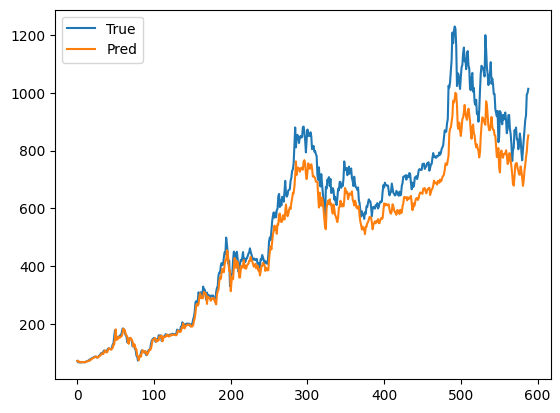

In [28]:
pred = model_LSTM.predict(X_test)

dummy_y_test = np.zeros((len(y_test), data.shape[1]))
dummy_pred = np.zeros((len(pred), data.shape[1]))

dummy_y_test[:, 3] = y_test
dummy_pred[:, 3] = pred[:, 0]

inverted_y_test = scaler.inverse_transform(dummy_y_test)[:, 3]
inverted_pred = scaler.inverse_transform(dummy_pred)[:, 3]

plt.plot(inverted_y_test, label='True')
plt.plot(inverted_pred, label='Pred')
plt.legend()
plt.show()

In [29]:
loss_rnn = model.evaluate(X_test, y_test, verbose=0)
print(f'SimpleRNN Test Loss (MSE): {loss_rnn:.4f}')

loss_lstm = model_LSTM.evaluate(X_test, y_test, verbose=0)
print(f'LSTM Test Loss (MSE): {loss_lstm:.4f}')

SimpleRNN Test Loss (MSE): 0.0015
LSTM Test Loss (MSE): 0.0049
